A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The data structure has been implemented as a class.

In [29]:
from ternary_search_tree import TernarySearchTree

# Example usage

Create a new empty ternery search tree.

In [30]:
tst = TernarySearchTree()

Insert the string `'abc'` into the tree.

In [31]:
tst.insert('abc')

Display the tree.

In [32]:
print(tst)

Insert another string `'aqt'`.

In [33]:
tst.insert('aqt')

In [34]:
print(tst)

The tree should now contain two strings.

In [35]:
len(tst)

2

In [36]:
tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [37]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [38]:
tst.search('ac')

False

The tree can also contain the empty string.

In [39]:
tst.insert('')

In [40]:
len(tst)

2

In [41]:
print(tst)

In [42]:
tst.all_strings()

['abc', 'aqt']

# Testing

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [43]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [44]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [45]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [46]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Chack that when searching for a exact match, only the inserted words are found, and no prefixes.

In [47]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                   f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [48]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [49]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [50]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [51]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

Benchmark the tree using 6 different input sizes

In [62]:
import time
from random import sample

# Load word list
word_file = "data/search_trees/corncob_lowercase.txt"
with open(word_file, 'r') as file:
    word_list = [w.strip() for w in file if w.strip()]

# Test data sizes
sizes = [100, 500, 1000, 5000, 10000, 20000]

insertion_times = []
lookup_times = []

# Performance testing
for n in sizes:
    test_words = word_list[:n]
    tree = TernarySearchTree()

    # Measure insertion performance
    t1 = time.time()
    for w in test_words:
        tree.insert(w)
    insertion_times.append(time.time() - t1)

    t2 = time.time()
    for w in test_words:
        tree.search(w)
    lookup_times.append(time.time() - t2)

Plotting the benchmark results

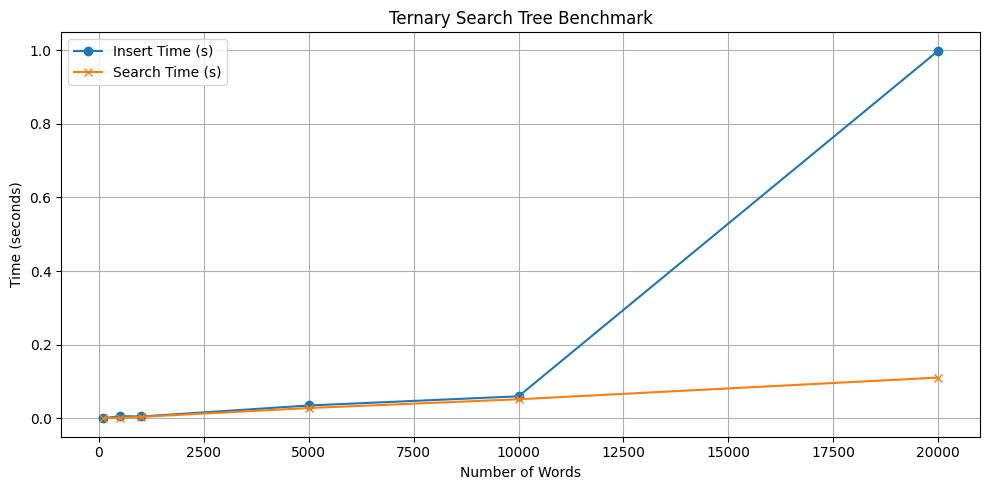

In [63]:
import matplotlib.pyplot as plt


# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sizes, insertion_times, marker='o', label='Insert Time (s)')
plt.plot(sizes, lookup_times, marker='x', label='Search Time (s)')
plt.title("Ternary Search Tree Benchmark")
plt.xlabel("Number of Words")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()